# Genesis 20: From Exegetical Question to TF Query
Before we get started make sure that you run in the Anaconda prompt the following command:

`pip install --upgrade text-fabric`


## Getting TF ready

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
A = use('bhsa', hoist=globals())

This is Text-Fabric 9.1.1
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

128 features found and 0 ignored


## the *valence* of לקח: rape or wedding?
As we saw in the previous notebook the use of the word of LQX[ in Gen 2:1 is rather ambigious. Lets search for all those cases where LQX has as direct object a female (`gn=f`) proper name (`sp=nmpr`).

In [4]:
LQXvalence1='''
clause
    phrase function=Pred
        word lex=LQX[
    phrase function=Objc
        word sp=nmpr gn=f nu=sg
'''
LQXvalence1  = A.search(LQXvalence1)
A.table(LQXvalence1, start=1, end=5, condensed=False, colorMap={3:'pink', 4:'blue'})

  1.47s 24 results


n,p,clause,phrase,word,phrase,word
1,Genesis 11:31,וַיִּקַּ֨ח תֶּ֜רַח אֶת־אַבְרָ֣ם בְּנֹ֗ו וְאֶת־לֹ֤וט בֶּן־הָרָן֙ בֶּן־בְּנֹ֔ו וְאֵת֙ שָׂרַ֣י כַּלָּתֹ֔ו אֵ֖שֶׁת אַבְרָ֣ם בְּנֹ֑ו,יִּקַּ֨ח,יִּקַּ֨ח,אֶת־אַבְרָ֣ם בְּנֹ֗ו וְאֶת־לֹ֤וט בֶּן־הָרָן֙ בֶּן־בְּנֹ֔ו וְאֵת֙ שָׂרַ֣י כַּלָּתֹ֔ו אֵ֖שֶׁת אַבְרָ֣ם בְּנֹ֑ו,שָׂרַ֣י
2,Genesis 12:5,וַיִּקַּ֣ח אַבְרָם֩ אֶת־שָׂרַ֨י אִשְׁתֹּ֜ו וְאֶת־לֹ֣וט בֶּן־אָחִ֗יו וְאֶת־כָּל־רְכוּשָׁם֙ וְאֶת־הַנֶּ֖פֶשׁ,יִּקַּ֣ח,יִּקַּ֣ח,אֶת־שָׂרַ֨י אִשְׁתֹּ֜ו וְאֶת־לֹ֣וט בֶּן־אָחִ֗יו וְאֶת־כָּל־רְכוּשָׁם֙ וְאֶת־הַנֶּ֖פֶשׁ,שָׂרַ֨י
3,Genesis 16:3,וַתִּקַּ֞ח שָׂרַ֣י אֵֽשֶׁת־אַבְרָ֗ם אֶת־הָגָ֤ר הַמִּצְרִית֙ שִׁפְחָתָ֔הּ מִקֵּץ֙ עֶ֣שֶׂר שָׁנִ֔ים,תִּקַּ֞ח,תִּקַּ֞ח,אֶת־הָגָ֤ר הַמִּצְרִית֙ שִׁפְחָתָ֔הּ,הָגָ֤ר
4,Genesis 20:2,וַיִּקַּ֖ח אֶת־שָׂרָֽה׃,יִּקַּ֖ח,יִּקַּ֖ח,אֶת־שָׂרָֽה׃,שָׂרָֽה׃
5,Genesis 24:61,וַיִּקַּ֥ח הָעֶ֛בֶד אֶת־רִבְקָ֖ה,יִּקַּ֥ח,יִּקַּ֥ח,אֶת־רִבְקָ֖ה,רִבְקָ֖ה


In [5]:
LQXvalence2='''
clause
    phrase
        word lex=LQX[
    phrase function=Objc
        word gn=f nu=sg
    phrase function=Cmpl
        word lex=>CH/
'''
LQXvalence2  = A.search(LQXvalence2)
A.table(LQXvalence2, start=1, end=5, condensed=False, colorMap={3:'pink', 4:'blue', 6:'red'})

#SHEBANQ query results are here: https://shebanq.ancient-data.org/hebrew/query?version=2017&id=493

  2.22s 19 results


n,p,clause,phrase,word,phrase,word,phrase,word
1,Genesis 25:20,בְּקַחְתֹּ֣ו אֶת־רִבְקָ֗ה בַּת־בְּתוּאֵל֙ הָֽאֲרַמִּ֔י מִפַּדַּ֖ן אֲרָ֑ם אֲחֹ֛ות לָבָ֥ן הָאֲרַמִּ֖י לֹ֥ו לְאִשָּֽׁה׃,בְּקַחְתֹּ֣ו,קַחְתֹּ֣ו,אֶת־רִבְקָ֗ה בַּת־בְּתוּאֵל֙ הָֽאֲרַמִּ֔י מִפַּדַּ֖ן אֲרָ֑ם אֲחֹ֛ות לָבָ֥ן הָאֲרַמִּ֖י,רִבְקָ֗ה,לְאִשָּֽׁה׃,אִשָּֽׁה׃
2,Genesis 25:20,בְּקַחְתֹּ֣ו אֶת־רִבְקָ֗ה בַּת־בְּתוּאֵל֙ הָֽאֲרַמִּ֔י מִפַּדַּ֖ן אֲרָ֑ם אֲחֹ֛ות לָבָ֥ן הָאֲרַמִּ֖י לֹ֥ו לְאִשָּֽׁה׃,בְּקַחְתֹּ֣ו,קַחְתֹּ֣ו,אֶת־רִבְקָ֗ה בַּת־בְּתוּאֵל֙ הָֽאֲרַמִּ֔י מִפַּדַּ֖ן אֲרָ֑ם אֲחֹ֛ות לָבָ֥ן הָאֲרַמִּ֖י,בַּת־,לְאִשָּֽׁה׃,אִשָּֽׁה׃
3,Genesis 25:20,בְּקַחְתֹּ֣ו אֶת־רִבְקָ֗ה בַּת־בְּתוּאֵל֙ הָֽאֲרַמִּ֔י מִפַּדַּ֖ן אֲרָ֑ם אֲחֹ֛ות לָבָ֥ן הָאֲרַמִּ֖י לֹ֥ו לְאִשָּֽׁה׃,בְּקַחְתֹּ֣ו,קַחְתֹּ֣ו,אֶת־רִבְקָ֗ה בַּת־בְּתוּאֵל֙ הָֽאֲרַמִּ֔י מִפַּדַּ֖ן אֲרָ֑ם אֲחֹ֛ות לָבָ֥ן הָאֲרַמִּ֖י,אֲחֹ֛ות,לְאִשָּֽׁה׃,אִשָּֽׁה׃
4,Genesis 28:9,וַיִּקַּ֡ח אֶֽת־מָחֲלַ֣ת׀ בַּת־יִשְׁמָעֵ֨אל בֶּן־אַבְרָהָ֜ם אֲחֹ֧ות נְבָיֹ֛ות עַל־נָשָׁ֖יו לֹ֥ו לְאִשָּֽׁה׃ ס,יִּקַּ֡ח,יִּקַּ֡ח,אֶֽת־מָחֲלַ֣ת׀ בַּת־יִשְׁמָעֵ֨אל בֶּן־אַבְרָהָ֜ם אֲחֹ֧ות נְבָיֹ֛ות,מָחֲלַ֣ת׀,לְאִשָּֽׁה׃ ס,אִשָּֽׁה׃ ס
5,Genesis 28:9,וַיִּקַּ֡ח אֶֽת־מָחֲלַ֣ת׀ בַּת־יִשְׁמָעֵ֨אל בֶּן־אַבְרָהָ֜ם אֲחֹ֧ות נְבָיֹ֛ות עַל־נָשָׁ֖יו לֹ֥ו לְאִשָּֽׁה׃ ס,יִּקַּ֡ח,יִּקַּ֡ח,אֶֽת־מָחֲלַ֣ת׀ בַּת־יִשְׁמָעֵ֨אל בֶּן־אַבְרָהָ֜ם אֲחֹ֧ות נְבָיֹ֛ות,בַּת־,לְאִשָּֽׁה׃ ס,אִשָּֽׁה׃ ס


The findings suggest that Gen 20:2 seeks to play with the reader's bias and immitates for the reader the bias of Abraham. Abimelech probably raped Sara and he is just another Sodomite who has no moral boundaries. Well, turns out, that this is not the case. See the next query...

## Finding *background* clauses in the narrative section
Narrative chains are sometimes interrupted by the narrator in order to provide background information that are supposed to chance the interpretative course of the reader and challange the reader's bias.
We can find these cases by searching for clauses that belong to the narrative domain (`domain=N`) but excluding that these clauses belong to the foreground tense Way. We exclude those tenses with `#` (`typ#WayX|Way0`).

In [6]:
NarrativeBackground = '''
verse book=Genesis chapter=20
    clause domain=N typ#WayX|Way0 rela=NA
'''
NarrativeBackground  = A.search(NarrativeBackground)
A.table(NarrativeBackground, start=1, end=40, condensed=False, colorMap={2: 'blue'})

  0.16s 4 results


n,p,verse,clause
1,Genesis 20:4,,וַאֲבִימֶ֕לֶךְ לֹ֥א קָרַ֖ב אֵלֶ֑יהָ
2,Genesis 20:6,,עַל־כֵּ֥ן לֹא־נְתַתִּ֖יךָ
3,Genesis 20:16,,וּלְשָׂרָ֣ה אָמַ֗ר
4,Genesis 20:18,,כִּֽי־עָצֹ֤ר עָצַר֙ יְהוָ֔ה בְּעַ֥ד כָּל־רֶ֖חֶם לְבֵ֣ית אֲבִימֶ֑לֶךְ עַל־דְּבַ֥ר שָׂרָ֖ה אֵ֥שֶׁת אַבְרָהָֽם׃ ס


What does this tell us?

Well, for the first finding in Gen 20:4 the text tries to shake up the bias of the reader (cf. "Abimelek probably raped Sara"). No! He did not! He is a gentlemen and you might want to know that before you continue reading/watching the story!

## finding syntactical incongruences in Genesis 20
Lets see whether we find cases in which the subject in a clause has a different number then the prediate.

In [7]:
SyntaxIncongruency1 = '''
verse book=Genesis chapter=20
    clause
        phrase function=Pred
            w1:word
        phrase function=Subj
            w2:word sp=subs
w1 .nu#nu. w2
'''
SyntaxIncongruency1 = A.search(SyntaxIncongruency1)
A.table(SyntaxIncongruency1, start=1, end=40, condensed=False, colorMap={4:'pink', 6:'lime'})

  1.83s 3 results


n,p,verse,clause,phrase,word,phrase,word
1,Genesis 20:3,,וַיָּבֹ֧א אֱלֹהִ֛ים אֶל־אֲבִימֶ֖לֶךְ בַּחֲלֹ֣ום הַלָּ֑יְלָה,יָּבֹ֧א,יָּבֹ֧א,אֱלֹהִ֛ים,אֱלֹהִ֛ים
2,Genesis 20:6,,וַיֹּאמֶר֩ אֵלָ֨יו הָֽאֱלֹהִ֜ים בַּחֲלֹ֗ם,יֹּאמֶר֩,יֹּאמֶר֩,הָֽאֱלֹהִ֜ים,אֱלֹהִ֜ים
3,Genesis 20:17,,וַיִּרְפָּ֨א אֱלֹהִ֜ים אֶת־אֲבִימֶ֧לֶךְ וְאֶת־אִשְׁתֹּ֛ו וְאַמְהֹתָ֖יו,יִּרְפָּ֨א,יִּרְפָּ֨א,אֱלֹהִ֜ים,אֱלֹהִ֜ים


Well, that was not surprising. Didn't we all expect that the morphological plural of >LHJM does not say anything about the semantic (i.e. the real) number of God. God is one! [Deut 6:4](https://shebanq.ancient-data.org/hebrew/text?book=Deuteronomium&chapter=6&verse=4&version=2017), [Deut 4:35](https://shebanq.ancient-data.org/hebrew/text?book=Deuteronomium&chapter=4&verse=35&version=2017), [Deut 4:39](https://shebanq.ancient-data.org/hebrew/text?book=Deuteronomium&chapter=4&verse=39&version=2017).

But lets double check do we find cases where the number of >LHJM and its prediate match? You might want to execute the command `S.relationsLegend()`in order to see what operator you would have to replace `#` with in order to have matching values for the `nu` feature.

In [8]:
# Task 1
# check out the relations operators by running the following code:
S.relationsLegend()

                      = left equal to right (as node)
                      # left unequal to right (as node)
                      < left before right (in canonical node ordering)
                      > left after right (in canonical node ordering)
                     == left occupies same slots as right
                     && left has overlapping slots with right
                     ## left and right do not have the same slot set
                     || left and right do not have common slots
                     [[ left embeds right
                     ]] left embedded in right
                     << left completely before right
                     >> left completely after right
                     =: left and right start at the same slot
                     := left and right end at the same slot
                     :: left and right start and end at the same slot
                     <: left immediately before right
                     :> left immediately after right
   

You can study how these relational operators are used by looking at the examples in this notebook: https://nbviewer.jupyter.org/github/annotation/tutorials/blob/master/bhsa/searchRelations.ipynb

In [9]:
# Task 2
# search for clauses in Gen 20 in which we find >LHJM/ as subject
# with a predicate, where both words (subject and predicate) match in number.
# Look at your final result!! That is surprising. What does this tell us about Abraham's theology?

## Text-grammatical rarities
Isn't the text-syntactical construction in Gen 20:9-10 weird? Why should the speaker and addressee be introduced for a second time when the same speaker is still speaking to the same addressee?

In [10]:
TwoSpeachesSameSpeaker1 = '''
chapter
        c1:clause domain=N
            phrase function=Pred
                word lex=DBR[|QR>[|>MR[
            phrase function=Subj
                speakerA:word sp=subs
            phrase function=Cmpl
                addresseeA:word
        c2:clause domain=Q
        c3:clause domain=N
            phrase function=Pred
                word lex=DBR[|QR>[|>MR[
            phrase function=Subj
                speakerB:word lex*
            phrase function=Cmpl
                addresseeB:word lex*

c1 <1: c2
c2 <50: c3
c1 < c3

speakerA .lex=lex. speakerB
addresseeA .lex=lex. addresseeB
'''
TwoSpeachesSameSpeaker1 = A.search(TwoSpeachesSameSpeaker1)
A.table(TwoSpeachesSameSpeaker1, start=1, end=50, condensed=True)

  6.41s 44 results


In [11]:
# Task 3
# change the code and find all cases of this phenomenon in Gen 16 
# (we could search the entire OT but that would take to long for this time)
# What observation do you make? And what does that mean for our case in Gen 20?

I have formulated the relevant query in SHEBANQ with the following results:
https://shebanq.ancient-data.org/hebrew/query?version=2017&id=491

In [12]:
# Task 4: Look at the results. What do you learn for our case in Gen 20:9-10 and the general text-linguistic phenomenon?

According to the query results one can indeed argue that the addressee in these narrations remains silent, unable to answer the question they are asked.

# Genesis 4:1
Lets investigate the case in Gen 4:1 and build a query that informs us about how to treat the issue and how to respond to the scholarly debate!
I did some queries in SHEBANQ that should inform your own query building:


https://shebanq.ancient-data.org/hebrew/query?version=2017&id=946

https://shebanq.ancient-data.org/hebrew/query?version=2017&id=947

https://shebanq.ancient-data.org/hebrew/query?version=2017&id=948

In [13]:
# Task 5
# Study the SHEBANQ queries and rebuild all queries as TF queries.

## General search for appositions within object phrases
Let us get acqainted with the phenomenon of appositions within object phrases in order to get a better understanding how the Hebrew language normally builds these constructions.


Lets have a look at the example in Gen 4:2:

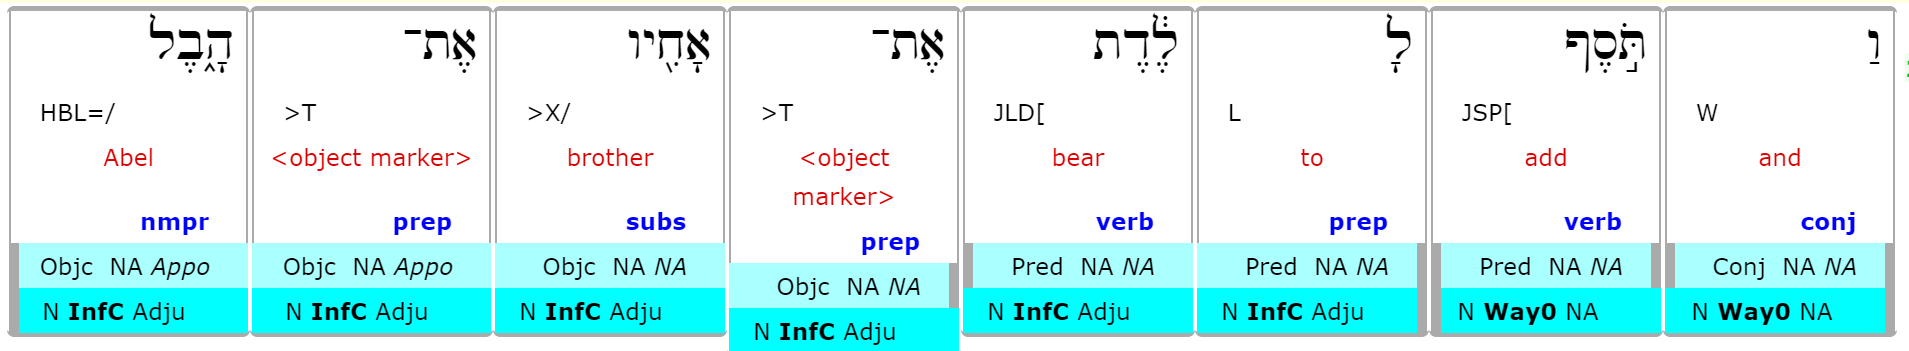


Searching for this phenomenon is done in SHEBANQ here: https://shebanq.ancient-data.org/hebrew/query?version=2017&id=946

Lets do it in TF.

In [14]:
# https://shebanq.ancient-data.org/hebrew/query?version=2017&id=946

AppInObject1 = '''
clause
    phrase function=Objc
        phrase_atom rela=Appo
'''
AppInObject1 = A.search(AppInObject1)
A.show(AppInObject1, start=1, end=2, condensed=False, colorMap={1: 'lightgreen', 2: 'yellow', 3: 'magenta', 4: 'magenta'})

  0.53s 898 results


## Searching for appositions in object phrases that are goverend by >T object marker
After the general query we are interested in all those cases where the apposition is goverend by an >T preposition (object marker).

In [15]:
# https://shebanq.ancient-data.org/hebrew/query?version=2017&id=947

AppInObject2 = '''
clause
    phrase function=Objc
        =: phrase_atom rela=NA
        <: phrase_atom rela=Appo
             =: word lex~>T.
'''
AppInObject2 = A.search(AppInObject2)
A.show(AppInObject2, start=1, end=2, condensed=True)

  1.55s 0 results


We do not find any results. But - one could argue - that the results are biased since the database has made a decision on the matter already. Therefore, you cannot find exceptions to the rule, as the database would automatically exclude them through their interpretation. So lets build a query that is undogmatic about the database interpretation and will thus also find our case in Gen 4:1.

In [16]:
AppInObject3 = '''
clause
        phrase function=Objc
        <: phrase_atom
             =: word lex~>T.
'''
AppInObject3 = A.search(AppInObject3)
A.show(AppInObject3, start=1, end=2, condensed=True)

  0.96s 76 results


These 76 cases are now intersting to study as the all catch the phenomenon we are looking for. Lets return to this query further below.

## Two times אֶת (>T) - one in the object phrase, one in the apposition
Since we want to remain undogmatic for now, we continue searching for the consonants `>T` instead, so that we can catch all homographs. The database has many different word features that are available for undogmatic searches. Here are some of them:

- `g_cons` / `g_cons_utf8`
- `g_lex` / `g_lex_utf8`
- `g_word` / `g_word_utf8`
- `lex` / `lex_utf8`
- `voc_lex` / `voc_lex_utf8`

Lets see what they stand for:

In [17]:
WordFeatures='''
book book=Genesis
    chapter chapter=2
        verse verse=4
            word g_cons* g_cons_utf8* g_lex* g_lex_utf8* g_word* g_word_utf8* lex* lex_utf8*  voc_lex* voc_lex_utf8*
'''
WordFeatures  = A.search(WordFeatures)
A.show(WordFeatures, start=1, end=5, condensed=False, colorMap={3:'pink', 4:'yellow'})

  5.07s 17 results


For our purpose its enough to use the `lex` features with regular expression (activated by `~`) we can find all lexemes that contain the consonants >T (both `>T` as object marker and `>T==` ("with")).

In [18]:
# https://shebanq.ancient-data.org/hebrew/query?version=2017&id=948

AppInObject4 = '''
clause
    phrase function=Objc
        phrase_atom rela=NA
            =: word lex~>T.*
        <: phrase_atom rela=Appo
             =: word lex~>T.*
'''
AppInObject4 = A.search(AppInObject4)
A.show(AppInObject4, start=1, end=2, condensed=True, colorMap={1: 'lightgreen', 2: 'cyan', 3: 'yellow', 5: 'magenta'})

  2.04s 59 results


The search results confirm that the default construction for appositional phrases is that when the first phrase atom has the >T object marker, the second, appositional phrase, will have the >T object marker as well.

## Searching object phrases goverened *not*  by >T BUT followed by an >T apposition


In [19]:
AppInObject5 = '''
clause
    phrase function=Objc
        phrase_atom rela=NA
            =: word lex#>T
        phrase_atom rela=Appo
            =: word lex=>T

'''
AppInObject5 = A.search(AppInObject5)
A.show(AppInObject5, start=1, end=10, condensed=True, colorMap={4:'pink', 6:'lime'})

  2.44s 2 results


As the search results, in the rare case of an >T apposition following a non >T object phrase_atom, the object phrase atom has definitiveness. This is, however, not the case in Gen 4:1.

## >T governing specifiers - in support of Doukhan!

In [20]:
# This shows  results that could actually be used to support Douhkahn's claim. 

AppInObject7 = '''
clause
    p1:phrase function=Objc
        pa1:phrase_atom rela=NA
              =: word lex#>T
        <: pa2:phrase_atom
              =: word lex=>T
'''
AppInObject7 = A.search(AppInObject7)
A.table(AppInObject7, start=1, end=5, condensed=False, colorMap={4:'pink', 6:'lime'})

  2.67s 15 results


n,p,clause,phrase,phrase_atom,word,phrase_atom,word
1,Genesis 6:10,וַיֹּ֥ולֶד נֹ֖חַ שְׁלֹשָׁ֣ה בָנִ֑ים אֶת־שֵׁ֖ם אֶת־חָ֥ם וְאֶת־יָֽפֶת׃,שְׁלֹשָׁ֣ה בָנִ֑ים אֶת־שֵׁ֖ם אֶת־חָ֥ם וְאֶת־יָֽפֶת׃,שְׁלֹשָׁ֣ה בָנִ֑ים,שְׁלֹשָׁ֣ה,אֶת־שֵׁ֖ם אֶת־חָ֥ם וְאֶת־יָֽפֶת׃,אֶת־
2,Exodus 35:25,וַיָּבִ֣יאוּ מַטְוֶ֗ה אֶֽת־הַתְּכֵ֨לֶת֙ וְאֶת־הָֽאַרְגָּמָ֔ן אֶת־תֹּולַ֥עַת הַשָּׁנִ֖י וְאֶת־הַשֵּֽׁשׁ׃,מַטְוֶ֗ה אֶֽת־הַתְּכֵ֨לֶת֙ וְאֶת־הָֽאַרְגָּמָ֔ן אֶת־תֹּולַ֥עַת הַשָּׁנִ֖י וְאֶת־הַשֵּֽׁשׁ׃,מַטְוֶ֗ה,מַטְוֶ֗ה,אֶֽת־הַתְּכֵ֨לֶת֙ וְאֶת־הָֽאַרְגָּמָ֔ן אֶת־תֹּולַ֥עַת הַשָּׁנִ֖י וְאֶת־הַשֵּֽׁשׁ׃,אֶֽת־
3,Leviticus 5:12,וְקָמַ֣ץ הַכֹּהֵ֣ן׀ מִ֠מֶּנָּה מְלֹ֨וא קֻמְצֹ֜ו אֶת־אַזְכָּרָתָה֙,מְלֹ֨וא קֻמְצֹ֜ו אֶת־אַזְכָּרָתָה֙,מְלֹ֨וא קֻמְצֹ֜ו,מְלֹ֨וא,אֶת־אַזְכָּרָתָה֙,אֶת־
4,Leviticus 26:16,וְהִפְקַדְתִּ֨י עֲלֵיכֶ֤ם בֶּֽהָלָה֙ אֶת־הַשַּׁחֶ֣פֶת וְאֶת־הַקַּדַּ֔חַת,בֶּֽהָלָה֙ אֶת־הַשַּׁחֶ֣פֶת וְאֶת־הַקַּדַּ֔חַת,בֶּֽהָלָה֙,בֶּֽהָלָה֙,אֶת־הַשַּׁחֶ֣פֶת וְאֶת־הַקַּדַּ֔חַת,אֶת־
5,Deuteronomy 1:22,וְיָשִׁ֤בוּ אֹתָ֨נוּ֙ דָּבָ֔ר אֶת־הַדֶּ֨רֶךְ֙ וְאֵת֙ הֶֽעָרִ֔ים,דָּבָ֔ר אֶת־הַדֶּ֨רֶךְ֙ וְאֵת֙ הֶֽעָרִ֔ים,דָּבָ֔ר,דָּבָ֔ר,אֶת־הַדֶּ֨רֶךְ֙,אֶת־


**The results of this query can be used to support the claim that Gen 4:1 uses >T YHWH as a specification (not apposition) to the object phrase "QJN"!**


**Look at the results. What do you learn for our case in Gen 20:9-10 and the general text-linguistic phenomenon?**

Lets return to our previous query where we sought undogmatically for ~>T goverend phrase atoms, that are not part of a preceding object phrase. We also want to exclude the case that the object phrase is goverend by the >T object marker in order to mimmic the construction of Gen 4:1 by bypassing the potential database bias. We do this by placing the pa2 phrase outside of the object phrase.

In [21]:
AppInObject5 = '''
clause
    p1:phrase function=Objc
        pa1:phrase_atom rela=NA
              =: word lex#>T
    <: pa2:phrase_atom
            =: word lex~>T.*
'''
AppInObject5 = A.search(AppInObject5)
A.table(AppInObject5, start=1, end=5, condensed=False, colorMap={4:'pink', 6:'lime'})

  2.68s 71 results


n,p,clause,phrase,phrase_atom,word,phrase_atom,word
1,Genesis 4:1,קָנִ֥יתִי אִ֖ישׁ אֶת־יְהוָֽה׃,אִ֖ישׁ,אִ֖ישׁ,אִ֖ישׁ,אֶת־יְהוָֽה׃,אֶת־
2,Genesis 14:2,עָשׂ֣וּ מִלְחָמָ֗ה אֶת־בֶּ֨רַע֙ מֶ֣לֶךְ סְדֹ֔ם וְאֶת־בִּרְשַׁ֖ע מֶ֣לֶךְ עֲמֹרָ֑ה שִׁנְאָ֣ב׀ מֶ֣לֶךְ אַדְמָ֗ה וְשֶׁמְאֵ֨בֶר֙ מֶ֣לֶךְ צְבֹויִ֔ם וּמֶ֥לֶךְ בֶּ֖לַע,מִלְחָמָ֗ה,מִלְחָמָ֗ה,מִלְחָמָ֗ה,אֶת־בֶּ֨רַע֙,אֶת־
3,Genesis 24:40,יְהוָ֞ה יִשְׁלַ֨ח מַלְאָכֹ֤ו אִתָּךְ֙,מַלְאָכֹ֤ו,מַלְאָכֹ֤ו,מַלְאָכֹ֤ו,אִתָּךְ֙,אִתָּךְ֙
4,Genesis 24:49,אִם־יֶשְׁכֶ֨ם עֹשִׂ֜ים חֶ֧סֶד וֶֽאֱמֶ֛ת אֶת־אֲדֹנִ֖י,חֶ֧סֶד וֶֽאֱמֶ֛ת,חֶ֧סֶד וֶֽאֱמֶ֛ת,חֶ֧סֶד,אֶת־אֲדֹנִ֖י,אֶת־
5,Genesis 43:8,שִׁלְחָ֥ה הַנַּ֛עַר אִתִּ֖י,הַנַּ֛עַר,הַנַּ֛עַר,הַ,אִתִּ֖י,אִתִּ֖י


## Searching for Object phrase followed by separate >T== ("with") phrase
Lets now double check whether our preliminary conclusions are supported when we look for those cases that Gerhard von Rad regards as very seldom and therfore akwared: A object phrase followed by a prepositional phrase goverend by >T==.

In [22]:
AppInObject5 = '''
clause
    phrase function=Objc
    <: phrase 
        =: word lex=>T==
'''
AppInObject5 = A.search(AppInObject5)
A.show(AppInObject5, start=1, end=5, condensed=False, colorMap={2:'red', 4:'lime'})

  0.90s 37 results


As the search results show, it is quite a normal phenomenon to have an >T== ("with") phrase follow an object phrase. Thus Gen 4:1 cannot be regarded as special but rather as a normal construction when rendered as "I purchased Kain with YHWH". But lets further dial into the phenomenon by searching for exactly the construction we find in Gen 4:1.

In [23]:
AppInObject5 = '''
clause
    phrase function=Objc
        =: word lex#>T
    < phrase 
        =: word lex=>T==
'''
AppInObject5 = A.search(AppInObject5)
A.show(AppInObject5, start=1, end=10, condensed=False, colorMap={3:'pink', 5:'lime'})

  1.98s 34 results


What we have assumed is now confirmed with the above query results. Gen 4:1 is a normal construction and should be rendered "I purchased Kain with YHWH".

In [24]:
# Task 6
# Look at the GT (stands for Greek Text = Septuagint) and check how it is rendered there.
# How do the GT translators treat our case?

The GT renders the construction the following way:


Αδαμ δὲ ἔγνω Ευαν τὴν γυναῖκα αὐτοῦ, καὶ συλλαβοῦσα ἔτεκεν τὸν Καιν καὶ εἶπεν Ἐκτησάμην ἄνθρωπον **διὰ τοῦ θεοῦ**.†


Thus אֶת־יְהוָֽה is not rendered as an accusative (i.e. Eve gave birth to YHWH) but as a genetive construction with διὰ rendering "through the God".

In [25]:
# Task 7
# Write up a short conclusion. What is your decision on the matter. How should one translate the phrase in question, 
# and what is right/wrong about the argumentation that you find in the new SDA commentary on Genesis?

**Oiriginal version**: Let me first say, that I believe that Eve had a messianic hope when she gave birth to Kain. However, I would disagree with your rendering of Gen 4:1 when you suggest “I have gotten a man, the Lord”. If you take אֶת־יְהוָֽה as apposition to אִ֖ישׁ, you would have a formulation that disagrees with the grammatical rules for appositions. Appositions always agree in their determination with the entity the re-render. Since יְהוָה is determined, אִישׁ must be determined, too, if an appositional construction is to be created. See the following queries:
1. https://shebanq.ancient-data.org/hebrew/query?version=2017&id=946: This query finds all cases in which an object phrase is containing an apposition. Only the apposition is highlighted. The results show, that when the 1st sub-phrase is determined the apposition sub-phrase is determined as well. Therefore, if the sub-phrases are determined they each are generally preceded by the nota accusativi אֶת.
2. https://shebanq.ancient-data.org/hebrew/query?version=2017&id=947: This query finds all cases in which an object phrase is containing an apposition which itself is part of a prepositional construction with אֵת. Only the apposition is highlighted. Of the 65 cases in 61 show that the preceding phrase atom is governed by the אֵת preposition as well.
3. https://shebanq.ancient-data.org/hebrew/query?version=2017&id=948: This query finds all cases in which an object phrase is containing an apposition which itself is part of a prepositional construction with אֵת. The preceding phrase_atom is not allowed to be an apposition but should be governed by the אֵת preposition. Both phrase atoms are highlighted. In comparison with https://shebanq.ancient-data.org/hebrew/query?version=2017&id=947 we see that a large majority (61 of 65 cases 61) shows that both the 1st and 2nd sub-phrase are governed by the אֵת preposition as well.

The same syntactical construction that we find in Gen 4:1 can be found e.g in Isa 28:15, Jer 34:13, Prov 16:19.

Finally, supporting the apposition rule of Biblical Hebrew, the LXX renders אֶת־יְהוָֽה with διὰ τοῦ θεοῦ/through the Lord.

This should not be the final word. Am more than happy if there are reasons that explain why the rule of grammar is broken here and the LXX is misled by following the default Hebrew Grammar rule.

**Revised Version** (based on the query 2.5 ">T governing specifiers...")